**Dataset Presentation💽:**

This Dataset contains the faces of 14 Celebrities

**Goal 🎯:**
- Create a computer vision model in machine learning that is able to recognize the faces of those 14 celebrities
- Show at the end the performance of the model on the validation set

**Checklist✏️:**
- Use Pytorch library ✅
- Apply some transforms on the images ✅
- Make predictions at the end on the validation set ✅
- Document your code ✅

## 01 - Download Library ⚙️

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/projet/CelebritiesClassifier/data

photo_credits.txt  train  val


## 02 -  Import Library 📦

In [ ]:
import torch
import torch.nn as nn
from torch.utils import data
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


## 03 - Load dataset 💽

In [ ]:
import os

# This code counts the total number of files in the specified directory and its subdirectories
count = 0

for dir in os.listdir('/content/drive/MyDrive/projet/CelebritiesClassifier/data/train'):
  doc = os.path.join('/content/drive/MyDrive/projet/CelebritiesClassifier/data/train', dir)
  if not os.path.isdir(doc):
    continue
  else:
    print(dir + ':', len(os.listdir(doc)))
    count+= len(os.listdir(doc))
count

will_smith: 16
mindy_kaling: 22
madonna: 19
simon_pegg: 14
sofia_vergara: 17
lauren_cohan: 10
keanu_reeves: 11
jerry_seinfeld: 21
elton_john: 17
kate_beckinsale: 11
ben_afflek: 14
arnold_schwarzenegger: 18
dwayne_johnson: 15
anne_hathaway: 15


220

## 04 - Preprocessing ⚙️

You can use transforms from pytorch on the images to augment your data or have a more robust model: https://pytorch.org/vision/0.9/transforms.html

- Definition

ReLU : It initializes a tensor x with random values and applies the ReLU (Rectified Linear Unit) activation function from PyTorch to this tensor, turning all negative values into zero, and then it prints the results.
An example below :

In [ ]:
m = nn.ReLU()
x = torch.randn(1, 3)
print(x)

print(m(x))

tensor([[ 0.0040,  0.8412, -2.1529]])
tensor([[0.0040, 0.8412, 0.0000]])


We are going to use the ResNet-50 model from pre-trained resources, a wise decision when you have limited data ( 220). ResNet-50 is a deep neural network with 50 layers that performs well due to its skip connections, and you can adjust it for your specific task with fewer layers.


In [ ]:
model = models.resnet50(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 174MB/s]


Let's see the differents layers ( 4 layers)

In [ ]:
model.layer1

Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): Bottleneck(
    (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, ke

In [ ]:
model.layer2

Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(256, 512, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): Bottleneck(
    (conv1): Conv2d(512, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(

In [ ]:
model.layer3

Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(256, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(512, 1024, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): Bottleneck(
    (conv1): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Co

In [ ]:
model.layer4

Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(1024, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(512, 2048, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(1024, 2048, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (1): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): Bottleneck(
    (conv1): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): 

In [ ]:
model.fc #Fully connected

Linear(in_features=2048, out_features=1000, bias=True)

In [ ]:
# Code to observe the dynamic of the covonlution
input = torch.randn(1, 3, 5, 4)
m = nn.Conv2d(3, 1, (2,2), stride=1)
out = m(input)
out.shape

torch.Size([1, 1, 4, 3])

In [ ]:
# The output and the input
print(input)
print(out)

tensor([[[[-0.1200,  1.0208,  0.9234,  1.8663],
          [ 0.9962, -1.3955,  1.8461, -0.0550],
          [-2.3439,  0.4161, -1.2299, -0.6775],
          [-3.0837, -1.0111, -0.2343,  1.6365],
          [-1.4333,  0.7973,  0.2862, -0.7186]],

         [[-0.5526,  0.7821, -0.3126,  0.2616],
          [ 1.1582,  0.9550,  1.2501, -0.7474],
          [ 1.6544,  1.0344,  1.1003,  0.7180],
          [-0.0563,  0.8789,  0.1758,  0.9695],
          [ 1.4622,  1.1173, -0.9806, -0.2868]],

         [[-0.1068, -0.1106, -0.5206, -0.1761],
          [ 0.5011,  0.0760, -0.5234, -1.3843],
          [-1.3490, -1.2501, -0.8214,  0.3284],
          [-0.1070,  0.5136,  0.3504,  1.1474],
          [ 0.1056,  1.1624, -0.4355,  0.2515]]]])
tensor([[[[-0.3909,  0.4066, -0.3367],
          [ 0.3860,  0.6577,  0.6699],
          [ 1.1014, -0.1736, -0.3569],
          [-0.6874, -1.1006,  0.0721]]]], grad_fn=<ConvolutionBackward0>)


In [ ]:
# Define the new output layer
num_classes = 14
new_output_layer = nn.Linear(model.fc.in_features, num_classes)

# Replace the old output layer with the new one
model.fc = new_output_layer

In [ ]:
# Freeze the weights of all layers except the fully connected layer.
for param in model.parameters():
    param.requires_grad = False

# Unfreeze the weights of the fully connected layer.
for param in model.fc.parameters():
    param.requires_grad = True

We are going to use **transforms** from Pytorch

Data augmentation, such as applying transforms, is applied to increase data variability and robustness, reduce overfitting, and improve a model's generalization by introducing diverse examples and patterns during training

I used data augmentation to increase the diversity of my dataset and observe whether the model becomes more stable. We effectively double our dataset size, going from 220 to 440 instances, just by using the data loader.

**Sources :**

https://doi.org/10.1186/s40537-019-0197-0

 https://journalofbigdata.springeropen.com/counter/pdf/10.1186/s40537-019-0197-0.pdf



In [ ]:
data_transforms = transforms.Compose([
    transforms.Resize((224,224)), # #Resizes the image to a size of 224x224 pixels. This can be useful for standardizing the input image size.
   #transforms.CenterCrop(224), #Because some of our images are not croped
    transforms.ToTensor(), ##Converts the image into a PyTorch tensor. Images are typically stored as multidimensional arrays
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) ##Normalizes the values of the image channels by subtracting the mean and dividing by the standard deviation
])

data_augment = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
     transforms.RandomRotation(15),
    transforms.Resize((224,224)),
   #transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


train_dataset_path = '/content/drive/MyDrive/projet_celebrities/CelebritiesClassifier/data/train'
train_data = torchvision.datasets.ImageFolder(root = train_dataset_path, transform = data_transforms )
aug_data = torchvision.datasets.ImageFolder(root = train_dataset_path, transform = data_augment )


In [ ]:
print(len(train_data))
print(len(aug_data))

220
220


In [ ]:
(train_data[0][0] == aug_data[0][0]).all()

tensor(False)

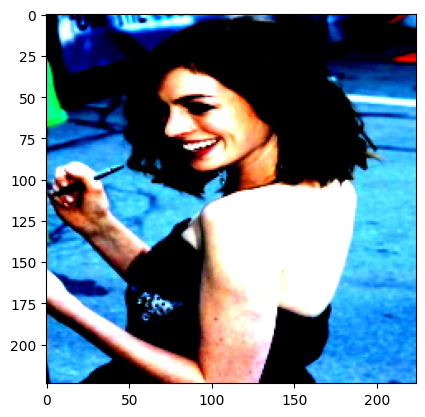

In [ ]:
import matplotlib.pyplot as plt
type(train_data[0][0])
plt.imshow(train_data[5][0].permute(1,2,0))

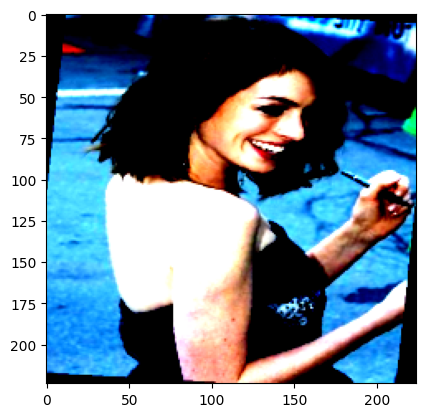

In [ ]:
plt.imshow(aug_data[5][0].permute(1,2,0))

In [ ]:
#We going to concatenate it the normal model and the augmented model

from torch.utils.data import ConcatDataset
train_data = ConcatDataset([train_data, aug_data])
print(len(train_data))

440


In [ ]:
train_data.classes

['anne_hathaway',
 'arnold_schwarzenegger',
 'ben_afflek',
 'dwayne_johnson',
 'elton_john',
 'jerry_seinfeld',
 'kate_beckinsale',
 'keanu_reeves',
 'lauren_cohan',
 'madonna',
 'mindy_kaling',
 'simon_pegg',
 'sofia_vergara',
 'will_smith']

In [ ]:
#Apply a dictionary to associate each value with the celebrityApply a dictionary to associate each value with the celebrity
train_data.class_to_idx #NO

{'anne_hathaway': 0,
 'arnold_schwarzenegger': 1,
 'ben_afflek': 2,
 'dwayne_johnson': 3,
 'elton_john': 4,
 'jerry_seinfeld': 5,
 'kate_beckinsale': 6,
 'keanu_reeves': 7,
 'lauren_cohan': 8,
 'madonna': 9,
 'mindy_kaling': 10,
 'simon_pegg': 11,
 'sofia_vergara': 12,
 'will_smith': 13}

In [ ]:
val_dataset_path = '/content/drive/MyDrive/projet/CelebritiesClassifier/data/val'
val_data = torchvision.datasets.ImageFolder(root = val_dataset_path, transform = data_transforms )

# Create the dataloaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(val_data, batch_size=16, shuffle=False)

We have 28 (14+14) because we have 16 batches and 220 observations so 220/16=13.75 and 220%16=12 so the code took the 14th

In [ ]:
print(len(train_loader))
print(len(next(iter(train_loader))))

28
2


## 05 - Model Training 📦

Use a deep learning model (exemple Resnet) and train it to recognize those 14 celebrities

For the dataset we need :
   - training set:
       - 80%: training
       - 20%: validation: allows you to control overfitting, tune hyperparameters
   - test set: validate your model, calculate indicators such as F1score, precision etc.



In [ ]:
print(next(iter(train_loader))[0].shape)
print(next(iter(train_loader))[1])

torch.Size([16, 3, 224, 224])
tensor([ 7,  1,  9,  5, 12, 10,  9, 10,  0,  3,  6,  3, 13,  5, 10,  5])


In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
count_parameters(model)

#We look the total max of the parameters and we look if the parameters need gradient

28686

In [ ]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss() #Entropy is the opposite of the likelihood, it is a metric used for discretes values
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)  #We can variate the lr : 0.1, 0.001, 0.0001 to see if we have a better accuracy

In [ ]:

# Train the model
train_losses = []
val_losses = []
epochs = 30
for epoch in range(epochs):
    # Train the model for one epoch
    model.train()
    batch_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Calculate the train loss.
        batch_loss += loss.item()/len(inputs)

    train_losses.append(batch_loss)

    # Evaluate the model on the test set
    model.eval()
    correct = 0
    total = 0
    batch_loss = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)


            # Calculate the train loss.
            loss =  criterion(outputs, labels)
            batch_loss += loss.item()/len(inputs)


            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_losses.append(batch_loss)

    accuracy = 100 * correct / total

    print('Epoch: {}/{} | Accuracy: {}'.format(epoch + 1, epochs, accuracy))



Epoch: 1/30 | Accuracy: 51.42857142857143
Epoch: 2/30 | Accuracy: 54.285714285714285
Epoch: 3/30 | Accuracy: 54.285714285714285
Epoch: 4/30 | Accuracy: 54.285714285714285
Epoch: 5/30 | Accuracy: 54.285714285714285
Epoch: 6/30 | Accuracy: 58.57142857142857
Epoch: 7/30 | Accuracy: 58.57142857142857
Epoch: 8/30 | Accuracy: 51.42857142857143
Epoch: 9/30 | Accuracy: 54.285714285714285
Epoch: 10/30 | Accuracy: 57.142857142857146
Epoch: 11/30 | Accuracy: 55.714285714285715
Epoch: 12/30 | Accuracy: 60.0
Epoch: 13/30 | Accuracy: 58.57142857142857
Epoch: 14/30 | Accuracy: 57.142857142857146
Epoch: 15/30 | Accuracy: 57.142857142857146
Epoch: 16/30 | Accuracy: 57.142857142857146
Epoch: 17/30 | Accuracy: 57.142857142857146
Epoch: 18/30 | Accuracy: 60.0
Epoch: 19/30 | Accuracy: 61.42857142857143
Epoch: 20/30 | Accuracy: 57.142857142857146
Epoch: 21/30 | Accuracy: 57.142857142857146
Epoch: 22/30 | Accuracy: 57.142857142857146
Epoch: 23/30 | Accuracy: 62.857142857142854
Epoch: 24/30 | Accuracy: 60.0
E

In [ ]:
train_losses

[2.2814940363168716,
 2.2543593645095825,
 2.221392188221216,
 2.1090977042913437,
 2.1261678598821163,
 2.012349598109722,
 2.074053220450878,
 2.0305422954261303,
 1.953008808195591,
 1.93421283736825,
 1.7957247905433178,
 1.7633590698242188,
 1.8019909262657166,
 1.7703440226614475,
 1.7542120404541492,
 1.743444249033928,
 1.672764167189598,
 1.6274872496724129,
 1.6717059947550297,
 1.6611756086349487,
 1.5753758735954762,
 1.5902437344193459,
 1.5166531056165695,
 1.5216196365654469,
 1.5016146004199982,
 1.4566118754446507,
 1.4684260450303555,
 1.3863591849803925,
 1.5068607162684202,
 1.3196685202419758]

In [ ]:
val_losses

[0.7132344543933868,
 0.7156271735827129,
 0.7099186728398006,
 0.6941253046194713,
 0.6993494232495625,
 0.6997527281443279,
 0.681991736094157,
 0.6830184981226921,
 0.6849228963255882,
 0.6761729642748833,
 0.6605988442897797,
 0.6565792287389438,
 0.6472609813014667,
 0.6645847385128338,
 0.6525109832485516,
 0.6610506226619084,
 0.6390551875034969,
 0.6381420195102692,
 0.6398576572537422,
 0.6540725181500118,
 0.64264361311992,
 0.6276627431313198,
 0.6304371058940887,
 0.6332101697723072,
 0.599175186206897,
 0.6416303540269535,
 0.6162008705238502,
 0.6329107756416004,
 0.630657924960057,
 0.6155878007411957]

**Learning curve on agmentation data**


The learning curve is a graph that shows the evolution of a model's performance based on the amount of training data, with both learning and validation curves. Overfitting occurs when the training curve decreases rapidly while the validation curve increases, indicating poor generalization. Underfitting happens when the curves plateau at high levels, revealing a model that is too simplistic. The goal is to strike a balance between these curves to achieve a well-generalized and high-performing model.


**Source :**
https://arxiv.org/pdf/2103.10948.pdf

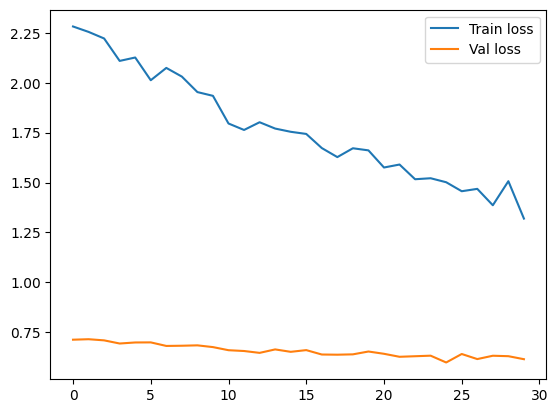

In [ ]:
# Plot the train and validation loss.
plt.plot(train_losses, label='Train loss')
plt.plot(val_losses, label='Val loss')
plt.legend()
plt.show()

Here, the training error is stable and starting to converge; we expect the validation error to stabilize or decrease as well. However, due to the lack of data, it is challenging to have a definitive conclusion, and artificially increasing data does not decisively help to conclude about the model's quality.

## 06 - Save model 📥

save the PyTorch model in ".pth" format

In [ ]:
# Save the trained model
torch.save(model.state_dict(), 'resnet50_celebrities.pt')
torch.save(model, 'model.pth')

Let's test the model.  Here we only have a train and validation test, so we will take a sample from our validation test to test the model

In [ ]:
test = next(iter(test_loader))
print(len(test))

2


In [ ]:
outputs = model(test[0])
_ , predicted = torch.max(outputs.data, 1)

In [ ]:
predicted

tensor([ 1,  5, 10,  5,  1, 10, 10, 10, 10, 10, 10, 10,  1, 10,  8,  1])

In [ ]:
predicted[0].item()

1

In [ ]:
train_data.class_to_idx

{'anne_hathaway': 0,
 'arnold_schwarzenegger': 1,
 'ben_afflek': 2,
 'dwayne_johnson': 3,
 'elton_john': 4,
 'jerry_seinfeld': 5,
 'kate_beckinsale': 6,
 'keanu_reeves': 7,
 'lauren_cohan': 8,
 'madonna': 9,
 'mindy_kaling': 10,
 'simon_pegg': 11,
 'sofia_vergara': 12,
 'will_smith': 13}

In [ ]:
dic = { value: key  for (key, value) in train_data.class_to_idx.items()}
dic

{0: 'anne_hathaway',
 1: 'arnold_schwarzenegger',
 2: 'ben_afflek',
 3: 'dwayne_johnson',
 4: 'elton_john',
 5: 'jerry_seinfeld',
 6: 'kate_beckinsale',
 7: 'keanu_reeves',
 8: 'lauren_cohan',
 9: 'madonna',
 10: 'mindy_kaling',
 11: 'simon_pegg',
 12: 'sofia_vergara',
 13: 'will_smith'}

In [ ]:
predicted_class = torch.argmax(outputs, dim=1).item()


torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


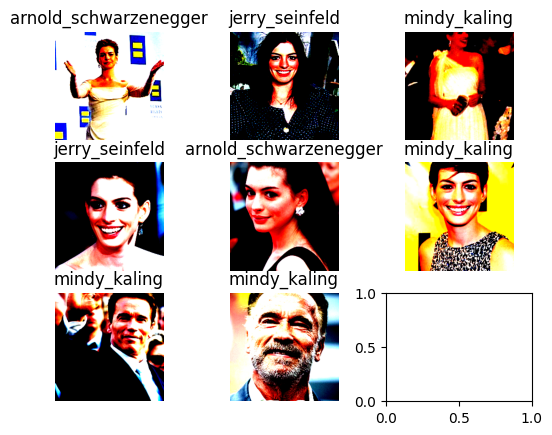

In [ ]:
# Plot images of the test set

fig, axs = plt.subplots(3, 3)
for i in range(8):
    inputs, labels = test[0][i], test[1][i]
    print(inputs.shape)
    image = inputs.permute(1, 2, 0).numpy()
    axs[i // 3, i % 3].imshow(image)
    predicted_prob = torch.softmax(outputs, dim=1)[0, predicted_class].item() * 100  # Pourcentage de la prédiction
    title = f'{dic[predicted_class]}\n({predicted_prob:.2f}%)'
    axs[i // 3, i % 3].set_title(dic[predicted[i].item()])
    axs[i // 3, i % 3].axis('off')

plt.show()

## 07 - Bonus: Use the Shap package to explain which variables are driving the prediction ✨

https://github.com/shap/shap

To explain which variables are driving the prediction, I chose **Grad-CAM**

Gradient-weighted Class Activation Mapping, is an interpretation technique for convolutional neural network (CNN) models primarily used in the context of image classification. Its main objective is to visualize and understand which regions of the image have significantly contributed to the decision made by the CNN model during image classification

**Source :** https://www.sciencedirect.com/science/article/pii/S095741742300310X

https://github.com/jacobgil/pytorch-grad-cam.git

In [ ]:

!pip install git+https://github.com/jacobgil/pytorch-grad-cam.git

  Cloning https://github.com/jacobgil/pytorch-grad-cam.git to /tmp/pip-req-build-yr03kmmb
  Running command git clone --filter=blob:none --quiet https://github.com/jacobgil/pytorch-grad-cam.git /tmp/pip-req-build-yr03kmmb
  Resolved https://github.com/jacobgil/pytorch-grad-cam.git to commit 09ac162e8f609eed02a8e35a370ef5bf30de19a1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.8-py3-none-any.whl size=37447 sha256=888585c5a86a806dcaa7b800defeb3fe581d1b396e56bb313d716dee12524944
  Stored in directory: /tmp/pip-ephem-wheel-cache-bmy0fpp1/wheels/23/11/66/71a38b0c29ba4ec5f62105a2145278613855bc9c94eecf630d
Successfully built grad-cam


We import the librairies

In [ ]:
import copy
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet18
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torchvision

In [ ]:
# Load model resnet50
model = models.resnet50(pretrained=True)
# Pick up layers for visualization
target_layers = [model.layer4[-1]]

First, let's create our dataframe

In [ ]:
import pandas as pd
from PIL import Image
import os

# We define the directory containing your images
image_directory = '/content/drive/MyDrive/projet/CelebritiesClassifier/data/train'

In [ ]:
image_files = []
for folder in os.listdir(image_directory):
    folder_path = os.path.join(image_directory, folder)
    if os.path.isdir(folder_path):
        image_files.extend([os.path.join(folder_path, filename) for filename in os.listdir(folder_path)])


In [ ]:
# Create a dictionary list to store data for each image
data = []

In [ ]:
#Browse image files, load them and store them in the dictionary list

for image_path in image_files:
    folder_name = os.path.basename(os.path.dirname(image_path))
    image = Image.open(image_path).convert('RGB')
    data.append({'Image_Path': image_path, 'Folder_Name': folder_name, 'Image': image})

In [ ]:
# Create a DataFrame from the dictionary list
df = pd.DataFrame(data)
df

,Image_Path,Folder_Name,Image
0,/content/drive/MyDrive/projet/CelebritiesClass...,will_smith,<PIL.Image.Image image mode=RGB size=462x450 a...
1,/content/drive/MyDrive/projet/CelebritiesClass...,will_smith,<PIL.Image.Image image mode=RGB size=372x566 a...
2,/content/drive/MyDrive/projet/CelebritiesClass...,will_smith,<PIL.Image.Image image mode=RGB size=538x599 a...
3,/content/drive/MyDrive/projet/CelebritiesClass...,will_smith,<PIL.Image.Image image mode=RGB size=423x599 a...
4,/content/drive/MyDrive/projet/CelebritiesClass...,will_smith,<PIL.Image.Image image mode=RGB size=636x599 a...
...,...,...,...
215,/content/drive/MyDrive/projet/CelebritiesClass...,anne_hathaway,<PIL.Image.Image image mode=RGB size=353x600 a...
216,/content/drive/MyDrive/projet/CelebritiesClass...,anne_hathaway,<PIL.Image.Image image mode=RGB size=498x599 a...
217,/content/drive/MyDrive/projet/CelebritiesClass...,anne_hathaway,<PIL.Image.Image image mode=RGB size=696x600 a...
218,/content/drive/MyDrive/projet/CelebritiesClass...,anne_hathaway,<PIL.Image.Image image mode=RGB size=800x600 a...


In [ ]:
path = df['Image_Path'][0]
path

'/content/drive/MyDrive/projet/CelebritiesClassifier/data/train/will_smith/David_Ayer_&_Will_Smith_(28316583290).jpg'

We choose the row of our choice within our DataFrame to apply Grad-CAM. In this case, we will select the first image that corresponds to Will Smith according to our dataframe


In [ ]:
path = df['Image_Path'][0] #We can change the position if we want to analyze another image
rgb_img = Image.open(path).convert('RGB')

In [ ]:
# Max min normalization
rgb_img = (rgb_img - np.min(rgb_img)) / (np.max(rgb_img) - np.min(rgb_img))

# Create an input tensor image for your model
input_tensor = torchvision.transforms.functional.to_tensor(rgb_img).unsqueeze(0).float()

# We construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=False)

grayscale_cam = cam(input_tensor=input_tensor)

# Here grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

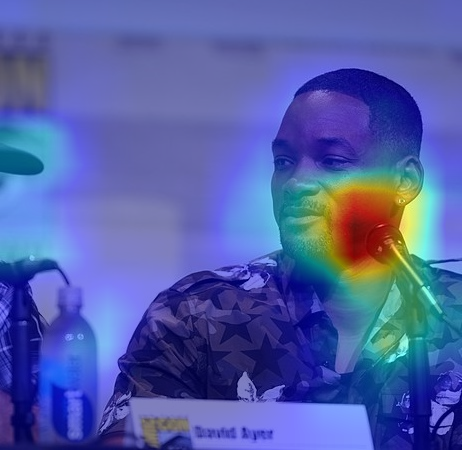

In [ ]:
Image.fromarray(visualization, 'RGB')